<center><b><font size=10>AllLife Bank</font></b></center>
<center><b><font size=6>Unsupervised Learning - Coded Project</font></b></center>

## **Context**
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

## **Objective**
To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## **Data Description & Dictionary**
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

- **Sl_No:** Primary key of the records
- **Customer Key:** Customer identification number
- **Average Credit Limit:** Average credit limit of each customer for all credit cards
- **Total credit cards:** Total number of credit cards possessed by the customer
- **Total visits bank:** Total number of visits that the customer made (yearly) personally to the bank
- **Total visits online:** Total number of visits or online logins made by the customer (yearly)
- **Total calls made:** Total number of calls made by the customer to the bank or its customer service department (yearly)

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Printing style
from tabulate import tabulate

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering
from sklearn.cluster import KMeans

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA


##**Reading the Dataset**

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Reading the input data to an object
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Credit+Card+Customer+Data.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Overview of the Dataset**

In [ ]:
# Checking the shape of the dataset
data.shape

(660, 7)

**Observations :**
- The dataset has 660 rows and 7 columns

In [ ]:
#Checking the no. of columns, data type and memory utilized by the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
# Checking random 5 sample records of the dataset
data.sample(n=5,random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3


**Observations :**

- The dataset contains 660 records and 7 numerical columns.
- All 7 columns are of integer datatype, with no missing data in any column.
- The dataset uses a total of 36.2 KB of memory.
- The columns "Sl_No" and "Customer Key" serve as primary keys, holding unique values for each customer. However, they do not add analytical value, so they will be excluded (one at a time) from the analysis.
- Hence we have a dataset with 660 records and 5 numerical variables for further analysis.


In [ ]:
# Checking if there is any Missing values
data.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


**Observations :**
- The dataset has no missing or null values

In [ ]:
# to check if there is any Negative values in the data set.
data.lt(0).sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


**Observations :**
- There are no negative values present in the dataset

In [ ]:
# Checking if there is any duplicate values
data.duplicated().sum()


0

There are no duplicate records in the original dataset.

In [ ]:
# Dropping the Sl_No column first
df= data.drop(['Sl_No'], axis=1)
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [ ]:
# Checking if there is any duplicates in Customer Key column in ascending order
df[df['Customer Key'].duplicated(keep=False)].sort_values('Customer Key')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


**Observations:**
- There are duplicates in the Customer Key column. Upon validating these records, we found that they have different credit limits and numbers of credit cards. This discrepancy could be due to data entry errors or inconsistencies in version updates.

- Since the exact cause is unclear and the dataset is relatively small, we will treat these entries as separate customer records for our analysis.

- Consequently, we will also drop the Customer Key column, as it does not hold significant value for our analysis.

In [ ]:
# Dropping the Sl_No column first
df= df.drop(['Customer Key'], axis=1)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
df.shape

(660, 5)

In [ ]:
data.shape

(660, 7)

In [ ]:
# Checking if there is any duplicate values in any of the columns
data.duplicated().sum()

0

**Observations :**
- There are no duplicate records found in the dataset

## **Statistical Summary of the Data**

In [ ]:
# Let's look at the statistical summary of the data
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations :**

- The Average credit limit shows a wide range, from \$3000 to \$200000, with a high standard deviation of \$37625 and a median value of \$18000 and a high chance of presence of outliers.
- The total number of credit cards that a customer holds varies from 1 to 10, with a mean of 4.7.
- Annual visits of a customer to the bank range from 0 to 5, with a mean of 2.4.
- Annual onlinevisits made by customer to the bank website range from 0 to 15, with a mean of 2.6, indicating the chances of outliers present.
- The number of service calls made by the customers annually ranges from 0 to 10, with a mean of 3.58, again indicating the presence of outliers.

##**Exploratory Data Analysis (EDA)**

It is important to investigate and understand the data better before building a model with it.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

###**Univariate Analysis**

Analysis on : Avg_Credit_Limit
----------------------------------------


<Figure size 1000x500 with 0 Axes>

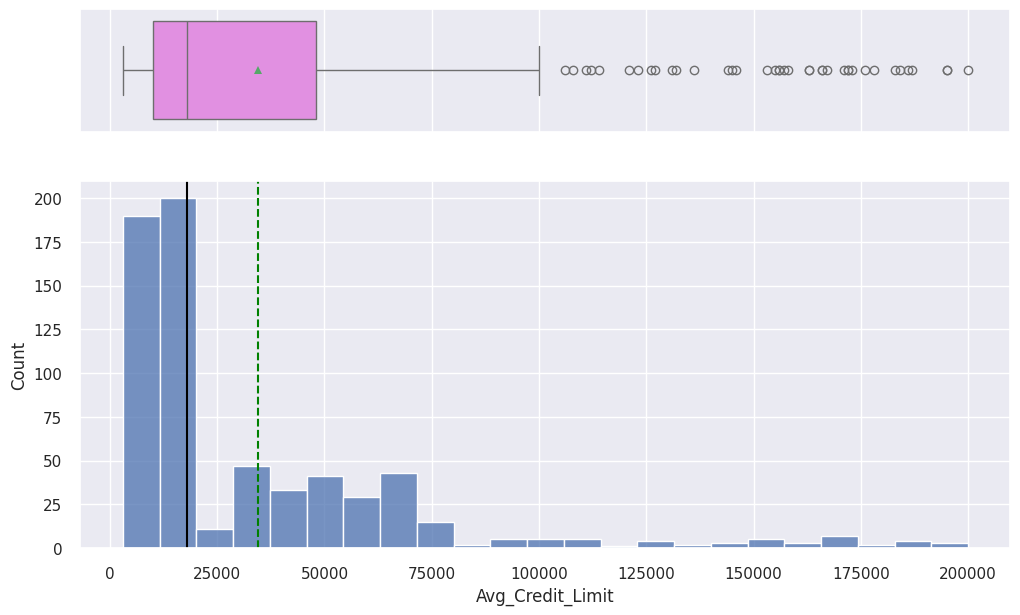

Statistical Summary
+-------+---------+---------+-------+-------+-------+-------+--------+
|       |   count |    mean |   Min |   25% |   50% |   75% |    Max |
|-------+---------+---------+-------+-------+-------+-------+--------|
| Value |     660 | 34574.2 |  3000 | 10000 | 18000 | 48000 | 200000 |
+-------+---------+---------+-------+-------+-------+-------+--------+



Analysis on : Total_Credit_Cards
----------------------------------------


<Figure size 1000x500 with 0 Axes>

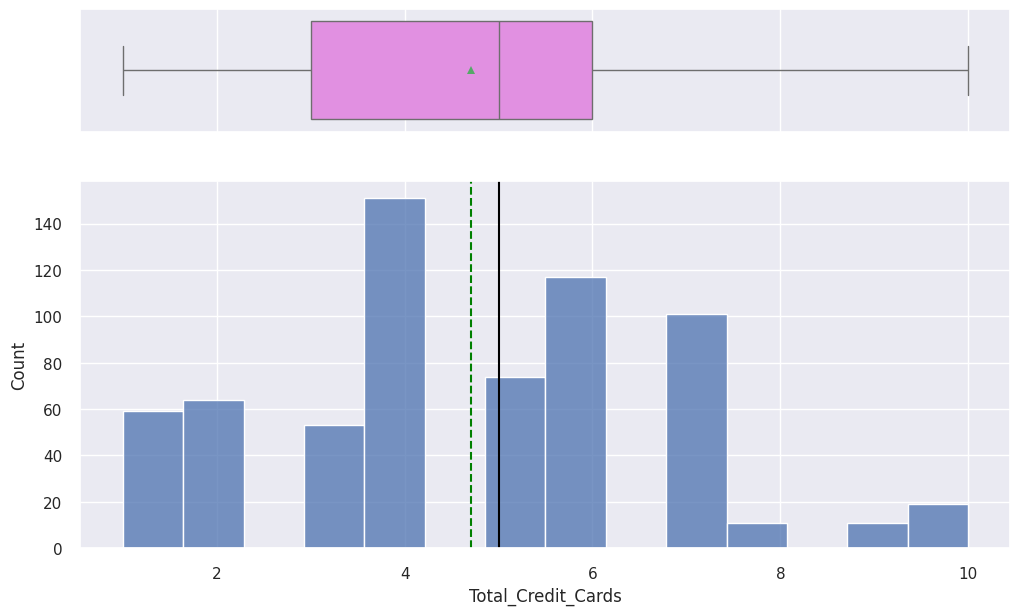

Statistical Summary
+-------+---------+---------+-------+-------+-------+-------+-------+
|       |   count |    mean |   Min |   25% |   50% |   75% |   Max |
|-------+---------+---------+-------+-------+-------+-------+-------|
| Value |     660 | 4.70606 |     1 |     3 |     5 |     6 |    10 |
+-------+---------+---------+-------+-------+-------+-------+-------+



Analysis on : Total_visits_bank
----------------------------------------


<Figure size 1000x500 with 0 Axes>

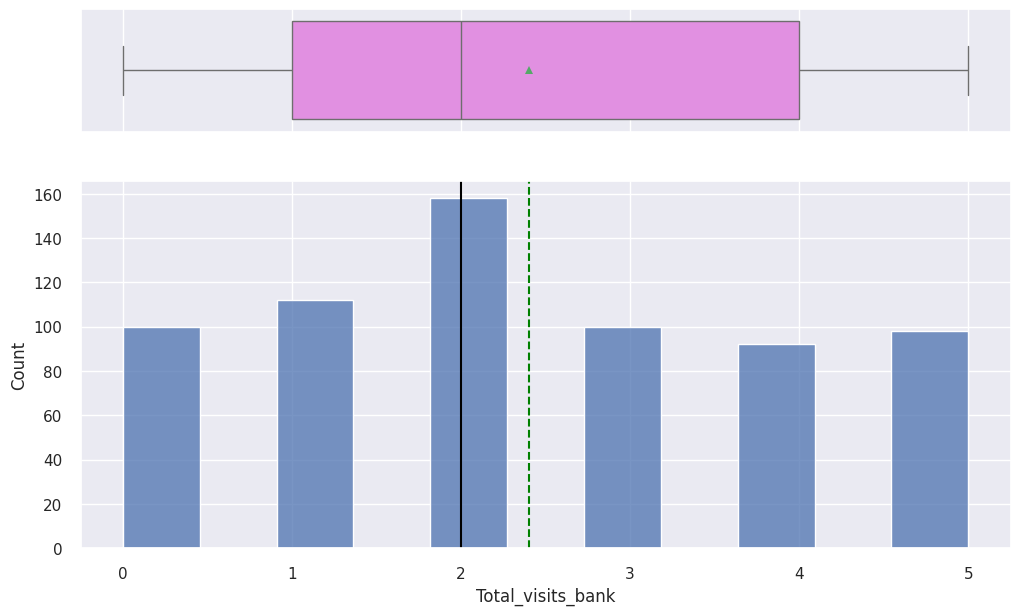

Statistical Summary
+-------+---------+---------+-------+-------+-------+-------+-------+
|       |   count |    mean |   Min |   25% |   50% |   75% |   Max |
|-------+---------+---------+-------+-------+-------+-------+-------|
| Value |     660 | 2.40303 |     0 |     1 |     2 |     4 |     5 |
+-------+---------+---------+-------+-------+-------+-------+-------+



Analysis on : Total_visits_online
----------------------------------------


<Figure size 1000x500 with 0 Axes>

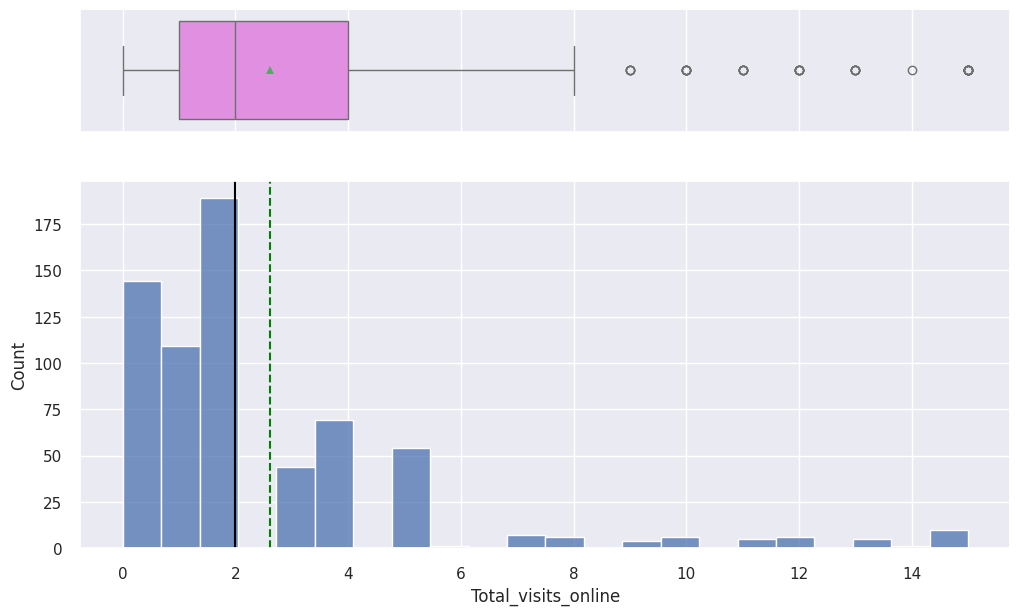

Statistical Summary
+-------+---------+---------+-------+-------+-------+-------+-------+
|       |   count |    mean |   Min |   25% |   50% |   75% |   Max |
|-------+---------+---------+-------+-------+-------+-------+-------|
| Value |     660 | 2.60606 |     0 |     1 |     2 |     4 |    15 |
+-------+---------+---------+-------+-------+-------+-------+-------+



Analysis on : Total_calls_made
----------------------------------------


<Figure size 1000x500 with 0 Axes>

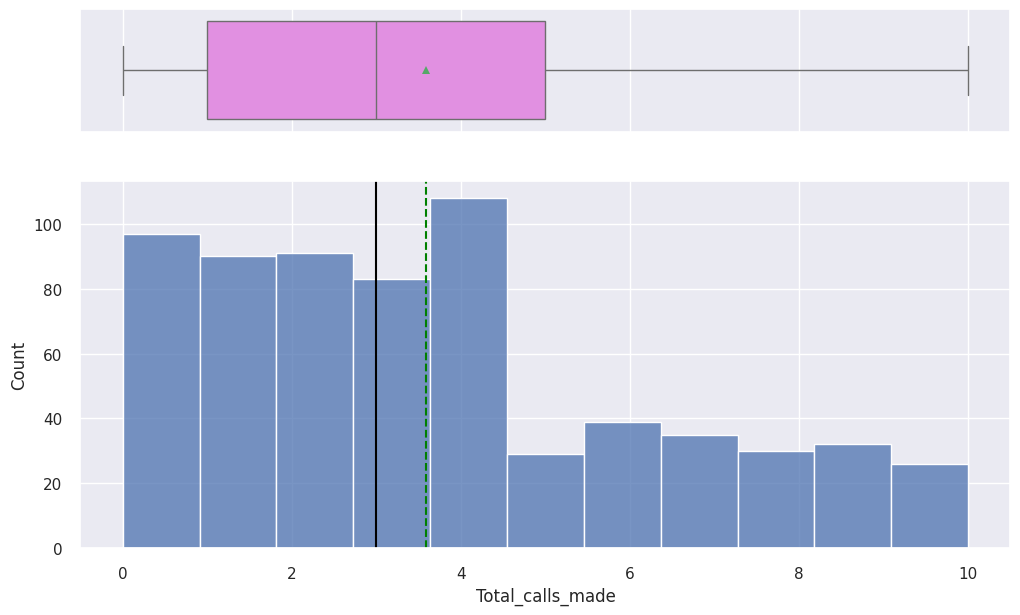

Statistical Summary
+-------+---------+---------+-------+-------+-------+-------+-------+
|       |   count |    mean |   Min |   25% |   50% |   75% |   Max |
|-------+---------+---------+-------+-------+-------+-------+-------|
| Value |     660 | 3.58333 |     0 |     1 |     3 |     5 |    10 |
+-------+---------+---------+-------+-------+-------+-------+-------+





In [ ]:
for col in df.columns:
    print("\033[1mAnalysis on : {}\033[0m".format(col))
    print('-'*40)
    plt.figure(figsize=(10,5))
    histogram_boxplot(df, col)
    plt.show()
    print('Statistical Summary')
    count = df[col].count()
    mean = df[col].mean()
    min = df[col].min()
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    max = df[col].max()

    dict={'count':count,'mean':mean,'Min': min, '25%': Q1, '50%': Q2, '75%': Q3, 'Max': max}
    df_stat = pd.DataFrame(data=dict, index=['Value'])
    print(tabulate(df_stat, headers = 'keys', tablefmt = 'psql'))
    #print(df[col].describe(include="all").T)
    print("\n\n")

**Observations:**

- **Avg_Credit_Limit** : Average_Credit_Limit ranges from 3000 to 200000 with the 75% of the limit as 48000. Majority of customers have relatively low credit limits and there is a small group with significantly higher limit. The distribution is strongly right-skewed with the presence of outliers.
- **Total_Credit_Cards** :  The number of credit cards held by customers ranges from 1 to 10, with an average of approximately 5 cards per customer.
- **Total_visits_bank** : The total number of bank visits made by customers varies between 0 and 5, with an average of about 2 visits per year.
- **Total_visits_online** : The number of online logins or visits by customers ranges from 0 to 15, with an average of approximately 2 visits per year, indicating the presence of outliers at the upper end.
- **Total_calls_made** : The total number of service calls made by customers ranges from 0 to 10, with an average of around 3 calls.

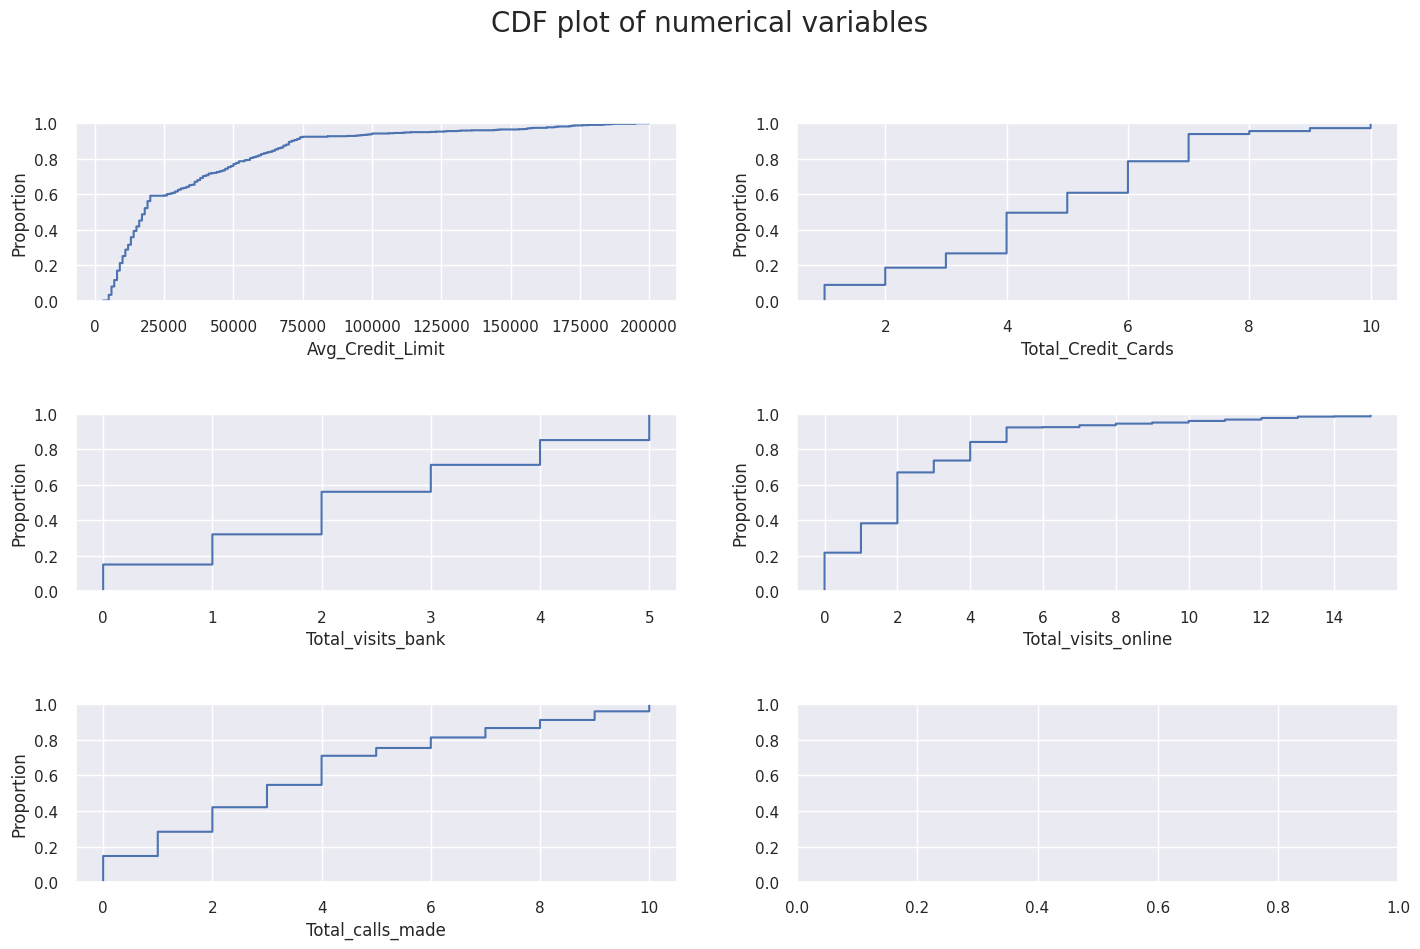

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.to_list()

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
counter = 0
fig.suptitle('CDF plot of numerical variables', fontsize=20)

for ii in range(3): # Change to range(3) instead of range(4)
    # Only plot as many subplots as you have numerical columns
    if counter < len(cols_list):
        sns.ecdfplot(ax=axes[ii][0], x=df[cols_list[counter]])
        counter = counter + 1

    if counter < len(cols_list):
        sns.ecdfplot(ax=axes[ii][1], x=df[cols_list[counter]])
        counter = counter + 1
    else:
        # Break the loop if you've plotted all numerical columns
        break

fig.tight_layout(pad=3.0)

**Observations:**

- Around 80% of customers have a credit limit below \$50000, with only a small proportion exceeding this amount.
- Around 50% of customers hold 4 or fewer credit cards.
- A majority of customers make 2 or fewer bank visits per year, with nearly 75% of customers visiting the bank no more than 4 times.
- Around 80% of customers have 4 or fewer online visits, with only a small proportion reaching the maximum of 15.
- Around 80% of customers have made 4 or fewer service calls

### **Bivariate Analysis**

**Avg_Credit_Limit Vs Total_Credit_Cards**


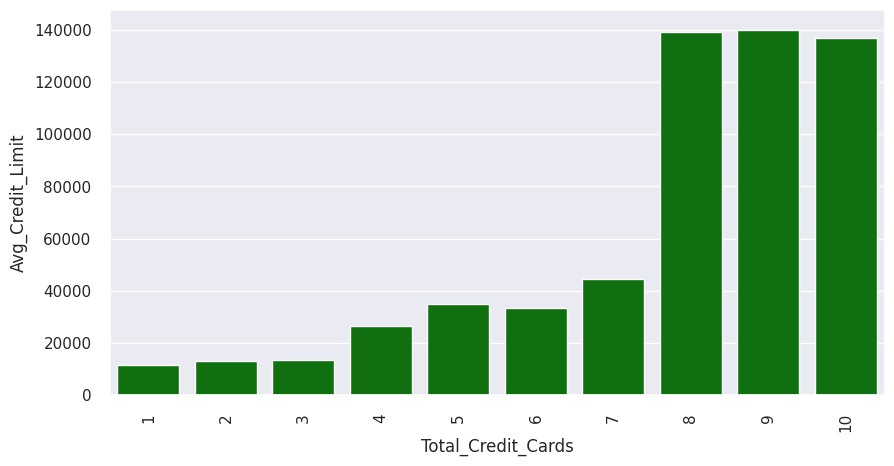

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit', ci=False,color='Green')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The average credit limit rises steeply for customers holding 7 or more credit cards indicating that the customers with more credit cards are generally offered higher credit limits.
- Customers with 1 to 4 credit cards have much lower average credit limits, typically below \$25,000.


**Avg_Credit_Limit Vs Total_visits_bank**


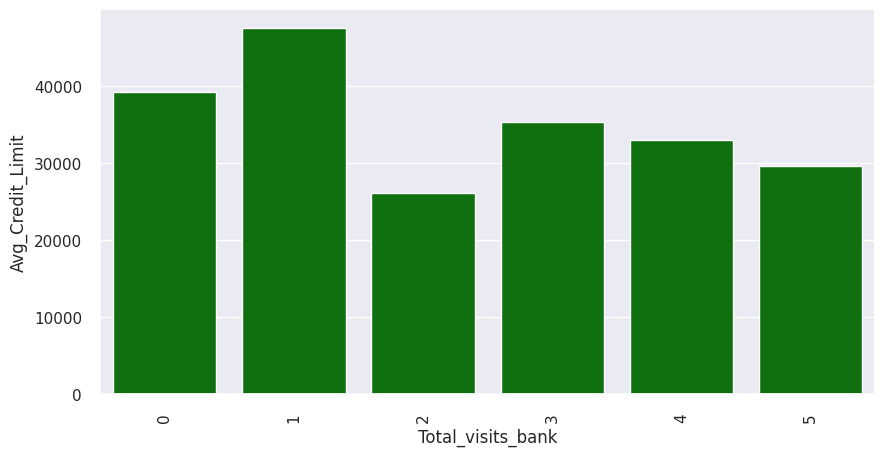

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Total_visits_bank', y='Avg_Credit_Limit', ci=False,color='Green')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The customers with high-credit-limits (more than \$40000)  may require fewer in-person interactions for assistance or prefer alternative support channels.
- Customers who visit the bank more often (2 or more times) tend to have lower average credit limits, with those visiting 5 times per year having an average limit around $30000.


**Avg_Credit_Limit Vs Total_visits_online**


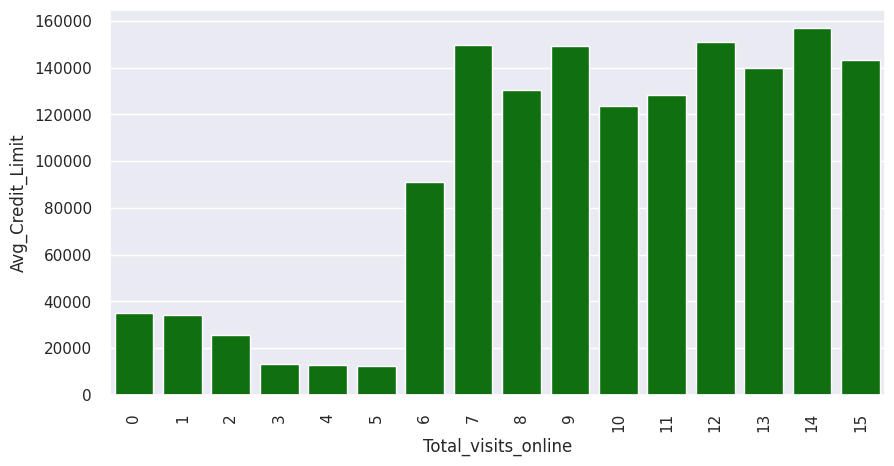

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Total_visits_online', y='Avg_Credit_Limit', ci=False,color='Green')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- Customers who visits online (through bank website) more frequently, especially those with 6 or more online visits per year, have significantly higher average credit limits.
- This could indicate that customers with higher credit-limits are more active in managing their accounts online.
- Customers with fewer online visits (between 0 and 5 visits) have much lower average credit limits which means customers with lower credit-limits may not engage as much with online banking.


**Avg_Credit_Limit Vs Total_calls_made**


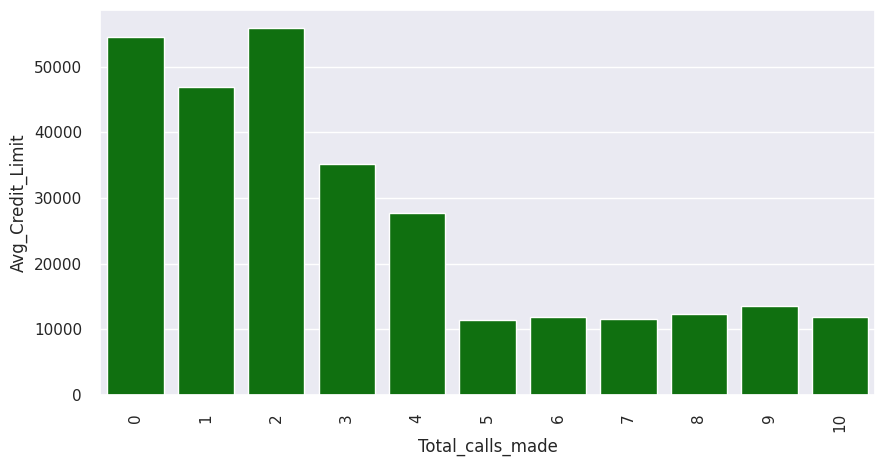

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Total_calls_made', y='Avg_Credit_Limit', ci=False,color='Green')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- Customers with fewer service calls (0 to 2 calls) tend to have significantly higher average credit limits, peaking above $50,000
- Customers who frequently make service calls (5 or more) have the lowest average credit limits.

**Total_Credit_Cards Vs Total_visits_bank**


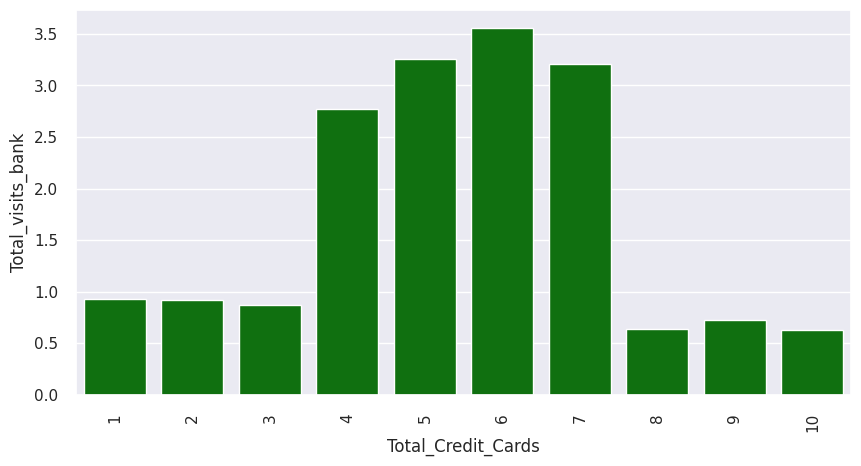

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, y='Total_visits_bank', x='Total_Credit_Cards', ci=False,color='Green')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- Customers with 4 to 7 credit cards tend to visit the bank more frequently, averaging around 3 to 3.5 visits per year.
- Customers hold upto 3 credit cards have lower bank visits, averaging around 1 visit per year.
- Similarly, those who holds more than 7 credit cards also have fewer bank visits, around 1 visit annually.

**Total_Credit_Cards Vs Total_visits_online**


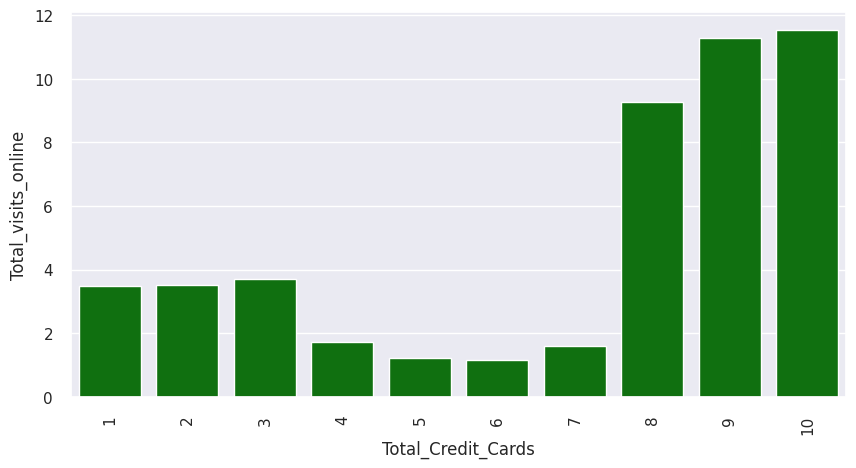

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, y='Total_visits_online', x='Total_Credit_Cards', ci=False,color='Green')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- Customers with 4 to 7 credit cards show the lowest online visits, averaging below 2 visits per year.
- Customers that holds upto 3 credit cards have lower online visits, averaging between 2 and 4 visits per year.
- Customers that holds more than 7 credit cards tend to engage heavily with online services averaging around 9 to 12 visits annually.

**Total_Credit_Cards Vs Total_calls_made**


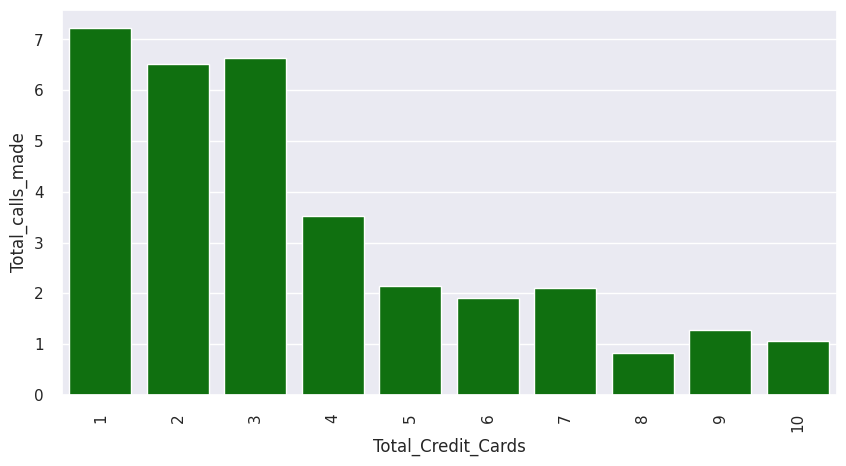

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, y='Total_calls_made', x='Total_Credit_Cards', ci=False,color='Green')
plt.xticks(rotation=90)
plt.show()

**Observations:**

- Customers with upto 3 credit cards make the most service calls, averaging around 6 to 7 calls
- Customers with more than 7 credit cards make the fewest calls, averaging around 1 to 2 calls.
- The trend shows a clear decrease in service calls as the number of credit cards increases.

<Figure size 1000x1000 with 0 Axes>

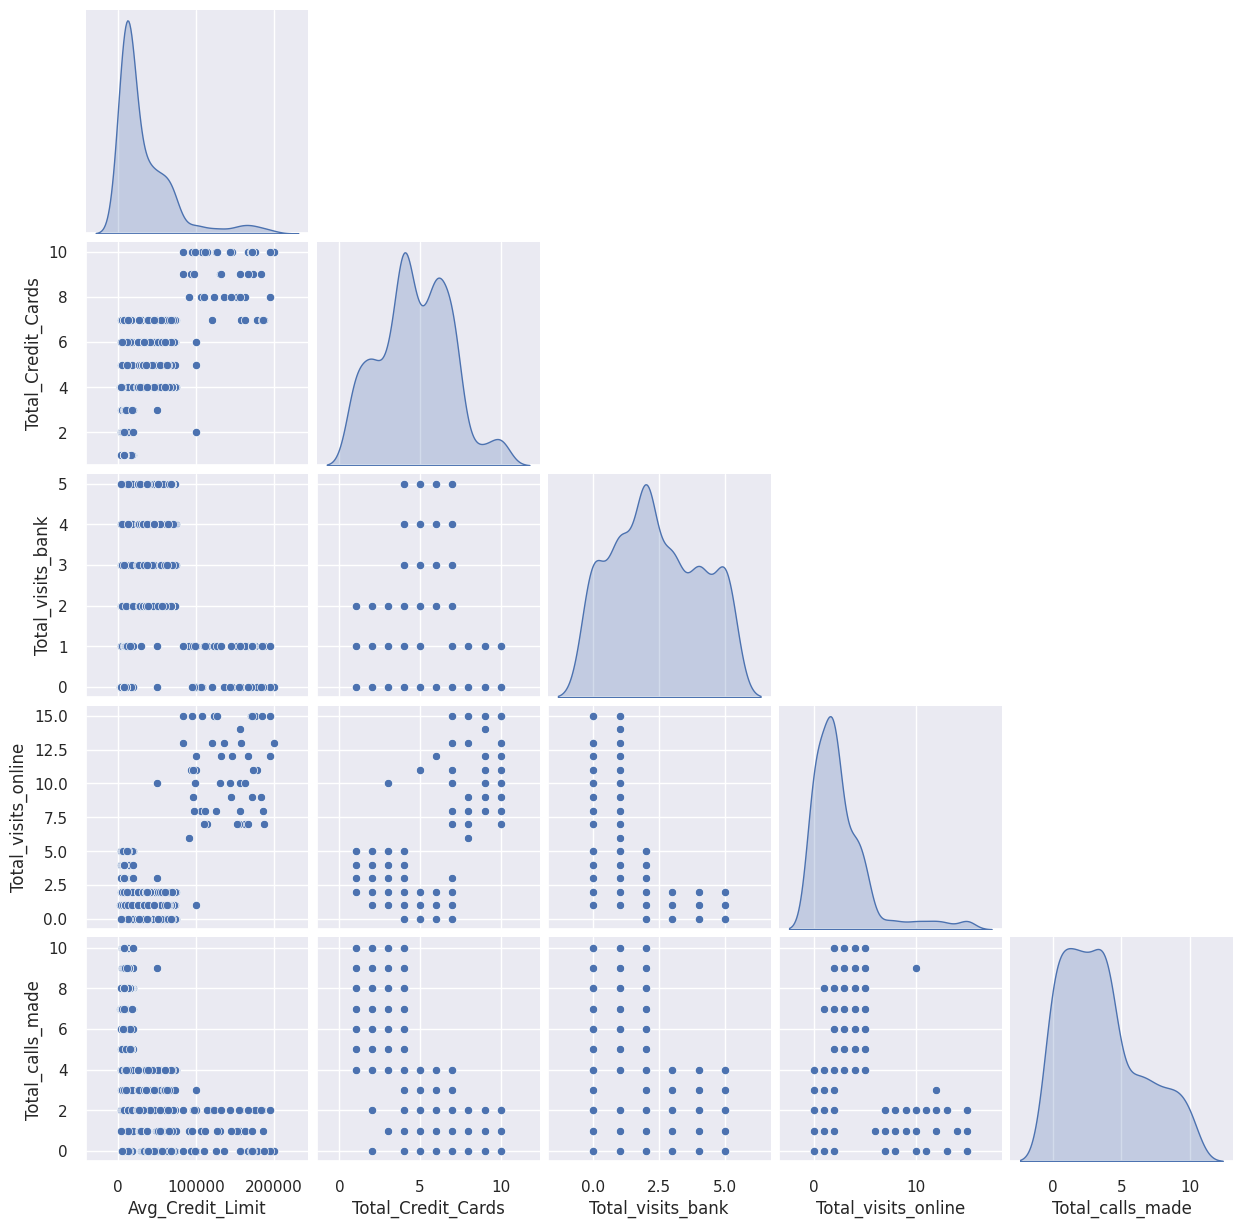

In [ ]:
plt.figure(figsize=(10,10));
sns.pairplot(data=df, diag_kind="kde",corner=True)
plt.show()

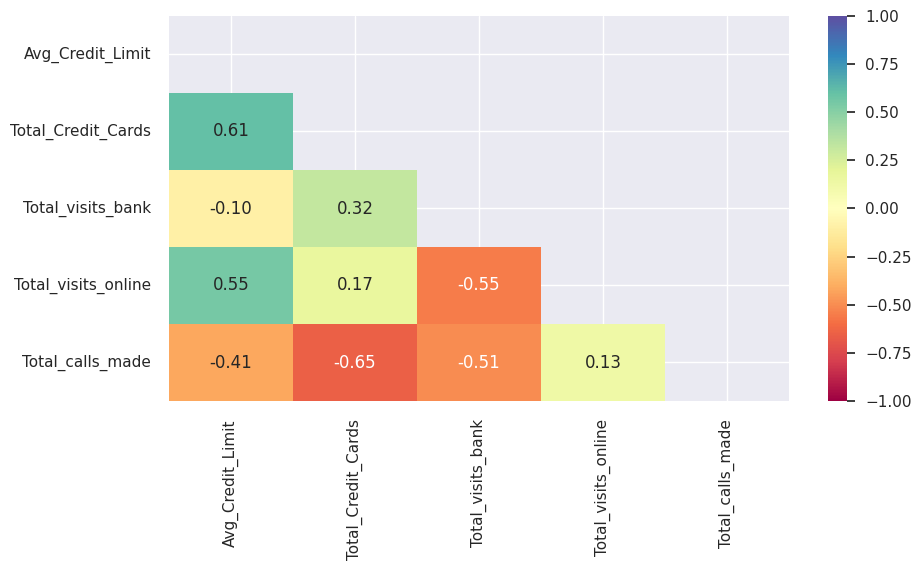

In [ ]:
# Plotting correlation heatmap of the features showing only lower diagonal

plt.figure(figsize=(10, 5))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask=np.triu(df.corr())
)
plt.show()

**Observations:**

- The Avg_Credit_Limit is moderately positively correlated with Total_Credit_Cards (0.61).
- Total_visits_online has a moderate positive correlation with Avg_Credit_Limit (0.55), suggesting that customers with higher credit limits may prefer online interactions over visiting the bank.
- Total_calls_made has a moderate negative correlation with Total_Credit_Cards (-0.65) and Total_visits_bank (-0.51).
- There is a moderate negative correlation between Total_visits_online and Total_visits_bank (-0.55).


## **Data Preprocessing**

### **Missing Value Treatment**

In [ ]:
# Checking for Missing values again
df.isnull().sum()

,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


**Observations :**
- As we validated already, there are no null or missing values in the dataset

In [ ]:
# Checking for any duplicated values again
df.duplicated().sum()

11

In [ ]:
#checking the duplicate records present in the dataset
df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


**Observations :**
- We don't need to treat these duplicate values as they are valid ones.

### **Outlier check**

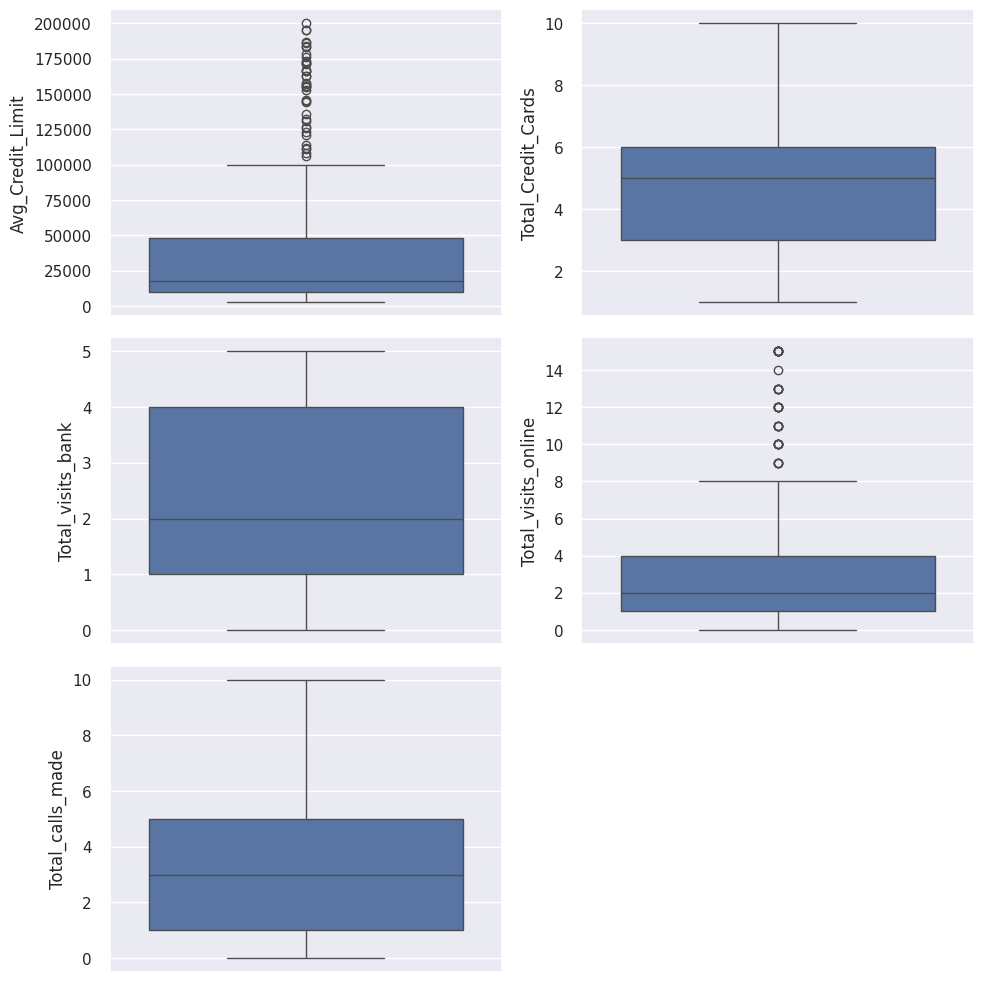

In [ ]:
# Visually checking distributions
sns.set(font_scale=1)

fig, axes = plt.subplots(3,2, figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
for axis, element in zip(axes.flat, cols_list):
    sns.boxplot(df[element], ax=axis)

axes[2,1].set_axis_off();
plt.tight_layout()



**Observations :**
- There are outliers in the columns : Avg_Credit_Limit and Total_visits_online.
- These outliers can significantly impact the centroids in K-Means clustering, as the algorithm is sensitive to extreme values, potentially leading to poor clustering results.
- So we will be treating these outliers prior to clustering. This can be done using:
i. Preprocessing steps like Z-score or
ii. IQR-based filtering to remove extreme values.

In [ ]:
# Function to calculate and display outlier values

def outlier_values(df,col):
    '''
    Calculate and display outlier values which are > 4*IQR
    '''
    print('\033[1mDetermining outlier values for: {}\033[0m'.format(col))
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    col_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'\nQ1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {col_4iqr}')
    outlier_vals = df.loc[np.abs(df[col] - df[col].median()) > col_4iqr, col]
    print('\nOutlier values:\n',np.sort(outlier_vals.unique()))
    print('\n')


for i in cols_list:
    outlier_values(df,i)

Determining outlier values for: Avg_Credit_Limit

Q1 = 10000.0, Q3 = 48000.0, 4*IQR = 152000.0

Outlier values:
 [171000 172000 173000 176000 178000 183000 184000 186000 187000 195000
 200000]


Determining outlier values for: Total_Credit_Cards

Q1 = 3.0, Q3 = 6.0, 4*IQR = 12.0

Outlier values:
 []


Determining outlier values for: Total_visits_bank

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0

Outlier values:
 []


Determining outlier values for: Total_visits_online

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0

Outlier values:
 [15]


Determining outlier values for: Total_calls_made

Q1 = 1.0, Q3 = 5.0, 4*IQR = 16.0

Outlier values:
 []




In [ ]:
#taking backup before treating outliers
df_backup = df.copy()

In [ ]:
# Treating outliers by flooring and capping
def treat_outliers(dtframe,coln):
    Q1=dtframe[coln].quantile(0.25) # 25th quantile
    Q3=dtframe[coln].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    dtframe[coln] = np.clip(dtframe[coln], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker
    return dtframe

def treat_outliers_all(dtframe, coln_list): # treat outliers in numerical column of Dataframe
    for c in coln_list:
        dtframe = treat_outliers(dtframe,c)

    return dtframe

In [ ]:
# Applying outlier treatment
df_treated_outlier = treat_outliers_all(df_backup,cols_list)

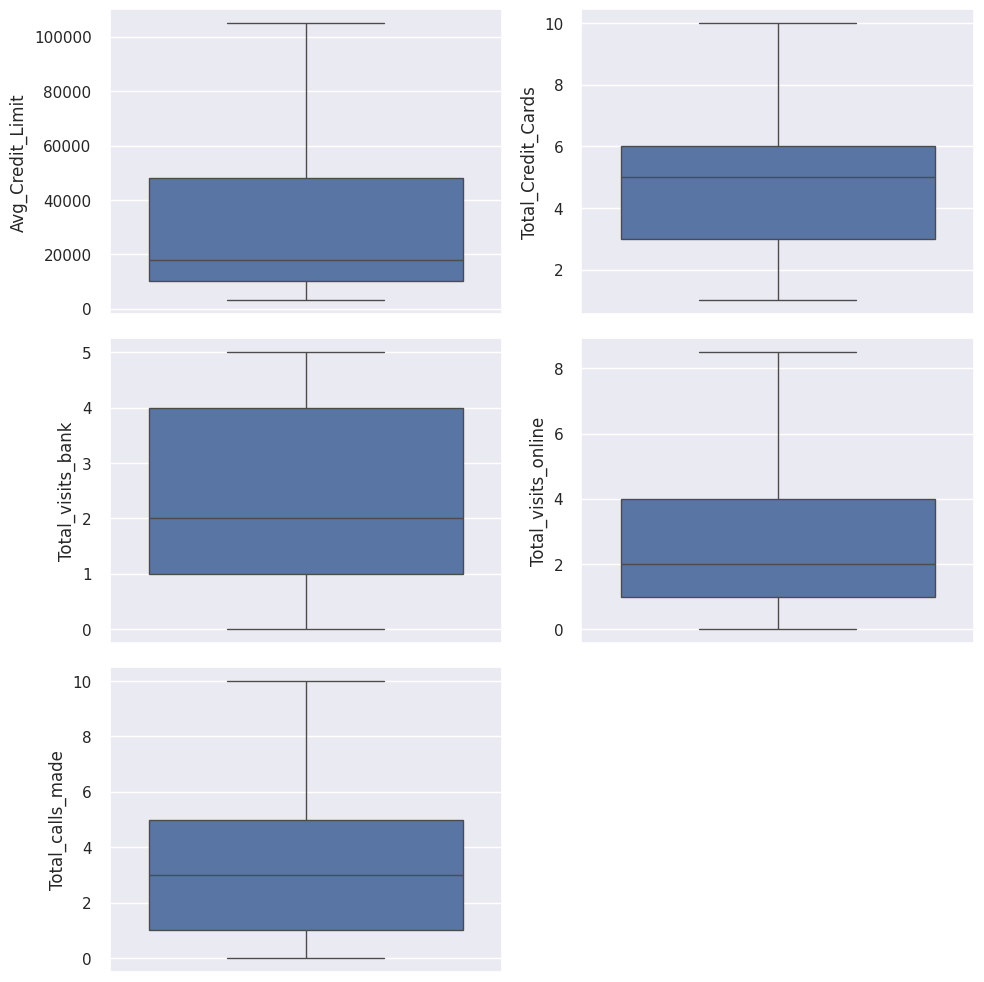

In [ ]:
# Visually checking distributions post Outlier Treatment
sns.set(font_scale=1)

fig, axes = plt.subplots(3,2, figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
for axis, element in zip(axes.flat, cols_list):
    sns.boxplot(df_treated_outlier[element], ax=axis)

axes[2,1].set_axis_off();
plt.tight_layout()

In [ ]:
# Function to calculate and display outlier values (Post outlier Treatment)

def outlier_values(dframe,col):
    '''
    Calculate and display outlier values which are > 4*IQR
    '''
    print('\033[1mDetermining outlier values for: {}\033[0m'.format(col))
    quartiles = np.quantile(dframe[col][dframe[col].notnull()], [.25, .75])
    col_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'\nQ1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {col_4iqr}')
    outlier_vals = dframe.loc[np.abs(dframe[col] - dframe[col].median()) > col_4iqr, col]
    print('\nOutlier values:\n',np.sort(outlier_vals.unique()))
    print('\n')


for i in cols_list:
    outlier_values(df_treated_outlier,i)

Determining outlier values for: Avg_Credit_Limit

Q1 = 10000.0, Q3 = 48000.0, 4*IQR = 152000.0

Outlier values:
 []


Determining outlier values for: Total_Credit_Cards

Q1 = 3.0, Q3 = 6.0, 4*IQR = 12.0

Outlier values:
 []


Determining outlier values for: Total_visits_bank

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0

Outlier values:
 []


Determining outlier values for: Total_visits_online

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0

Outlier values:
 []


Determining outlier values for: Total_calls_made

Q1 = 1.0, Q3 = 5.0, 4*IQR = 16.0

Outlier values:
 []




**Observations :**
- So all the outliers have been taken care.

### **Data Scaling**

In [ ]:
#Scaling the data using StandarScalar
scaler=StandardScaler()
df_scaled = df_treated_outlier.copy()
df_scaled.iloc[:, :] = scaler.fit_transform(df_scaled.iloc[:, :])

#taking backup of dataset post scaling
df_scaled_backup = df_scaled.copy()
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


##**K-means Clustering**

In [ ]:
# creating dataframe copies for k-means and hierarchical clustering
df_scaled_km = df_scaled_backup.copy()
df_scaled_hc = df_scaled_backup.copy()

### **Checking Elbow Plot**

In [ ]:
df_scaled_km.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


Number of Clusters: 2 	Average Distortion: 1.5644761102409188
Number of Clusters: 3 	Average Distortion: 1.1823298853410937
Number of Clusters: 4 	Average Distortion: 1.0841115271019353
Number of Clusters: 5 	Average Distortion: 1.0048977741354534
Number of Clusters: 6 	Average Distortion: 0.9523045514676391
Number of Clusters: 7 	Average Distortion: 0.9150640969095024
Number of Clusters: 8 	Average Distortion: 0.9064269947698546
Number of Clusters: 9 	Average Distortion: 0.8761684073643214
Number of Clusters: 10 	Average Distortion: 0.859002950994212


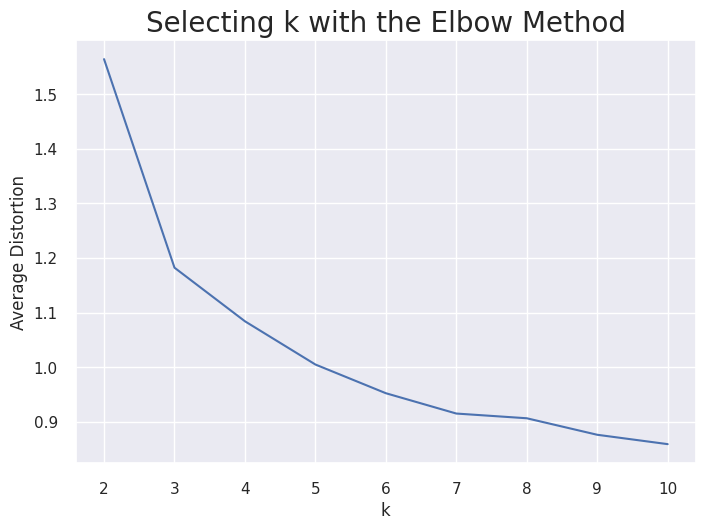

In [ ]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_scaled_km)
    prediction = model.predict(df_scaled_km)
    distortion = (
        sum(np.min(cdist(df_scaled_km, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaled_km.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Appropriate k seems to be either 3 or 5. Let's do further analysis to determine the optimal value of k**

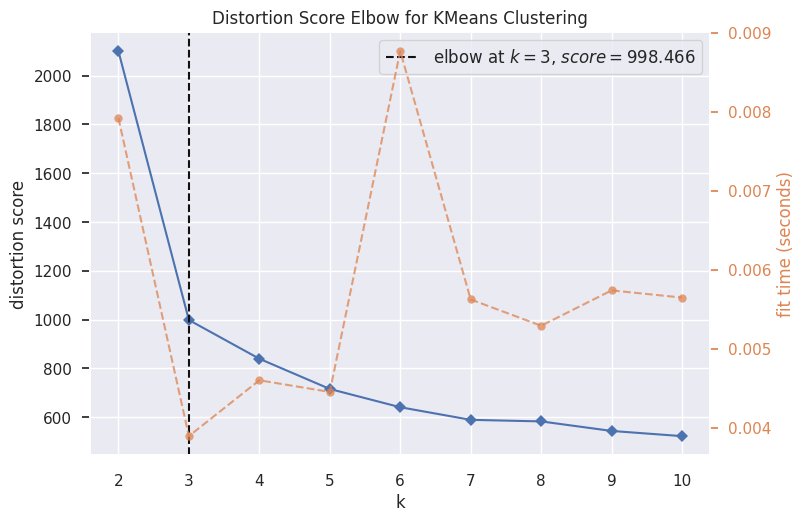

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(df_scaled_km)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### **Checking Silhouette Scores**

For n_clusters = 2, the silhouette score is 0.41566376037364616)
For n_clusters = 3, the silhouette score is 0.5169867470092899)
For n_clusters = 4, the silhouette score is 0.3622536188897813)
For n_clusters = 5, the silhouette score is 0.35332888701008774)
For n_clusters = 6, the silhouette score is 0.2709226003031914)
For n_clusters = 7, the silhouette score is 0.26697460158252345)
For n_clusters = 8, the silhouette score is 0.2434188704366567)
For n_clusters = 9, the silhouette score is 0.233454050085403)
For n_clusters = 10, the silhouette score is 0.2249104655326491)


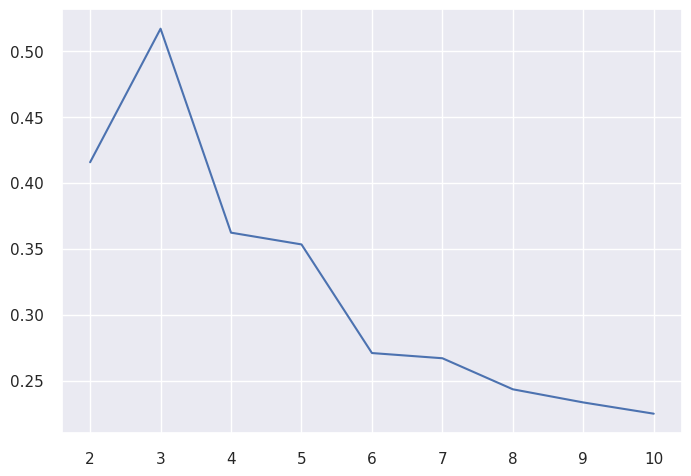

In [ ]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict((df_scaled_km))
    score = silhouette_score(df_scaled_km, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

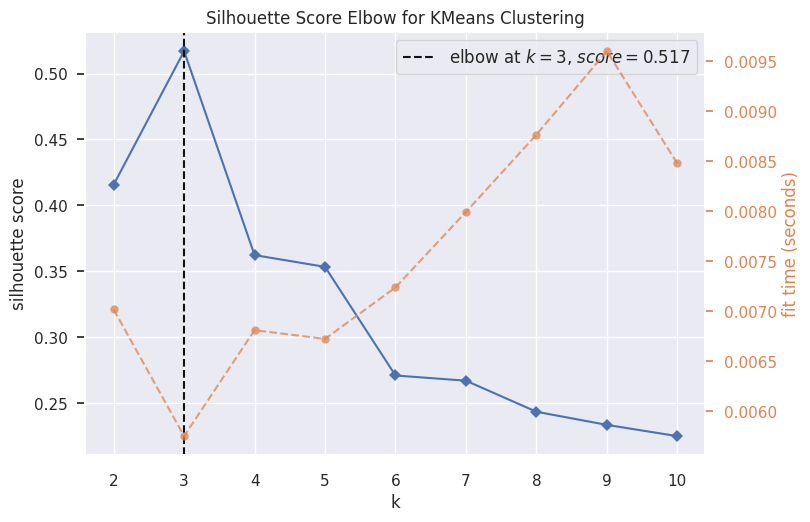

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(df_scaled_km)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Comparing these 2 scores:**
- **k=2** has the highest silhouette score, indicating the most well-separated clusters.
- **k=3** is optimal in terms of distortion, suggesting it balances intra-cluster compactness and model complexity.

###**Silhouette Plot**

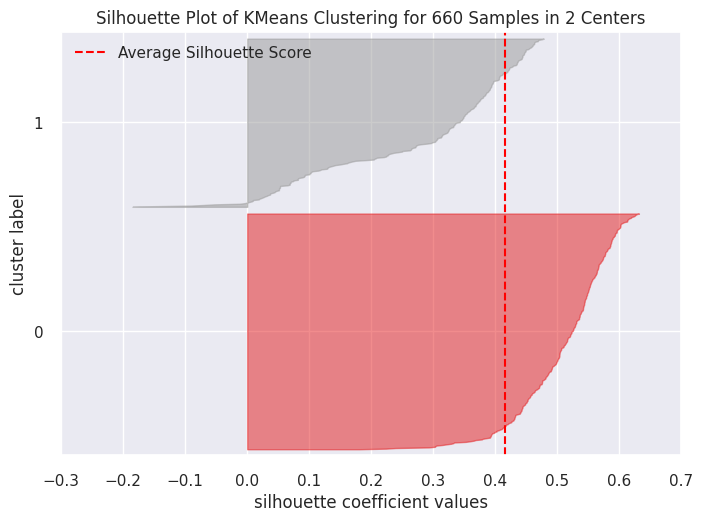

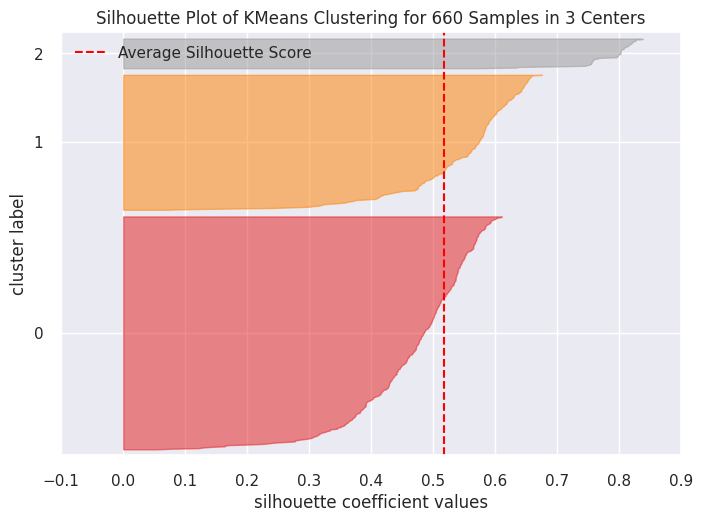

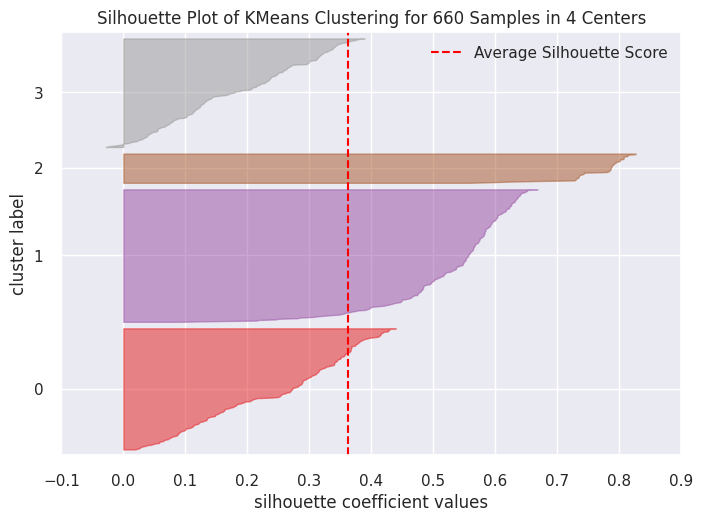

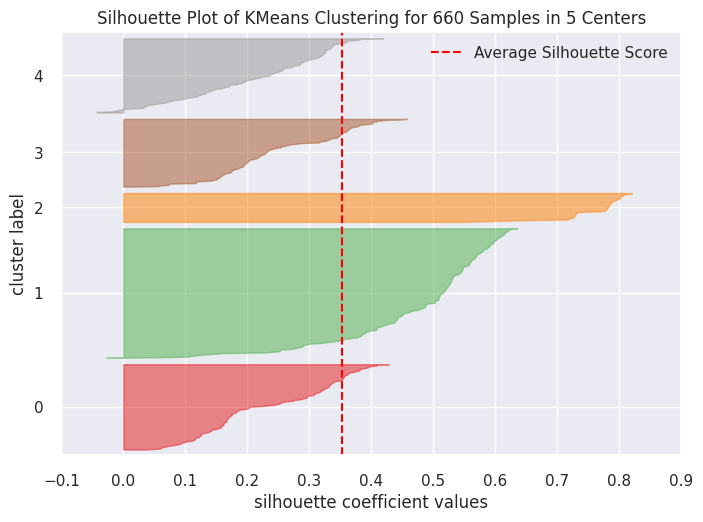

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
for i in range(2,6):
    visualizer = SilhouetteVisualizer(KMeans(i, random_state=0))
    visualizer.fit(df_scaled_km)
    visualizer.show()

### **Creating Final Model**

Based on the Elbow and Silhouette analyses,
**K=3**
is the optimal number of clusters. It provides a good balance of clustering quality (as indicated by higher Silhouette scores) and efficiency

In [ ]:
# Creating Final Model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled_km)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df_km = df_backup.copy()
df_km["KM_segments"] = kmeans.labels_

In [ ]:
df_km.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_segments
0,100000,2,1,1.0,0,0
1,50000,3,0,8.5,9,1
2,50000,7,1,3.0,4,0
3,30000,5,1,1.0,4,0
4,100000,6,0,8.5,3,2


###**Cluster Profiling**###

In [ ]:
km_cluster_profile = df_km.groupby('KM_segments').mean()
km_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KM_segments,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.546875,6.870536
2,102660.000000,8.740000,0.600000,8.180000,1.080000


In [ ]:
km_cluster_profile["Count_in_each_segment"] = (
    df_km.groupby("KM_segments")["Total_Credit_Cards"].count().values
)

# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
KM_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.546875,6.870536,224
2,102660.000000,8.740000,0.600000,8.180000,1.080000,50


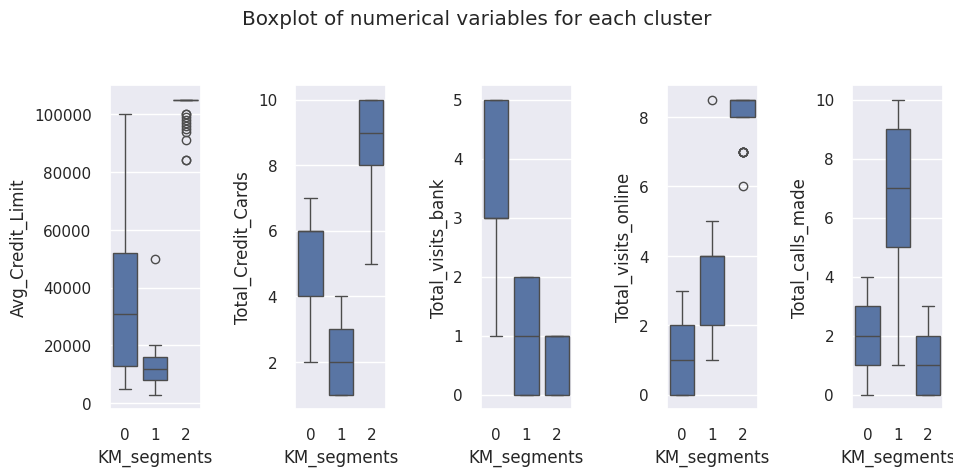

In [ ]:
list_columns =  km_cluster_profile.columns
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_km[list_columns[counter]],x=df_km['KM_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

<Axes: xlabel='KM_segments'>

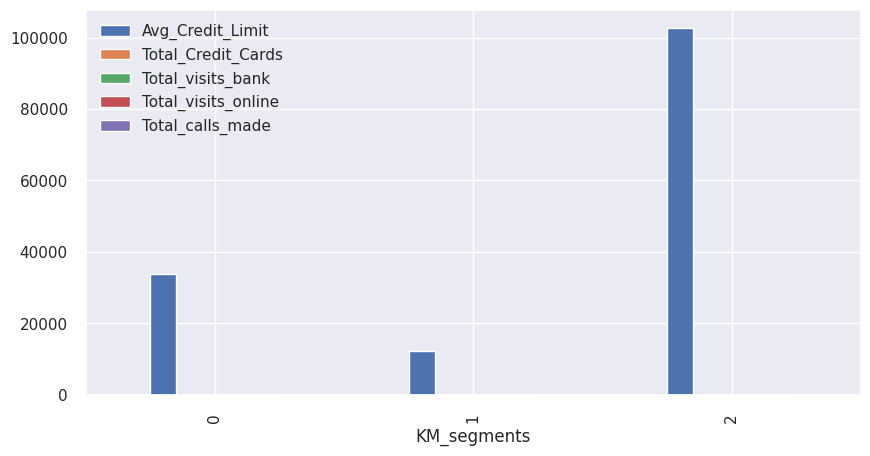

In [ ]:
df_km.groupby("KM_segments").mean(numeric_only = True).plot.bar(figsize=(10, 5))

The values in Avg_Credit_Limit are significantly larger compared to those in other columns, so we're splitting the bar plot for better feature analysis.








<Axes: xlabel='KM_segments'>

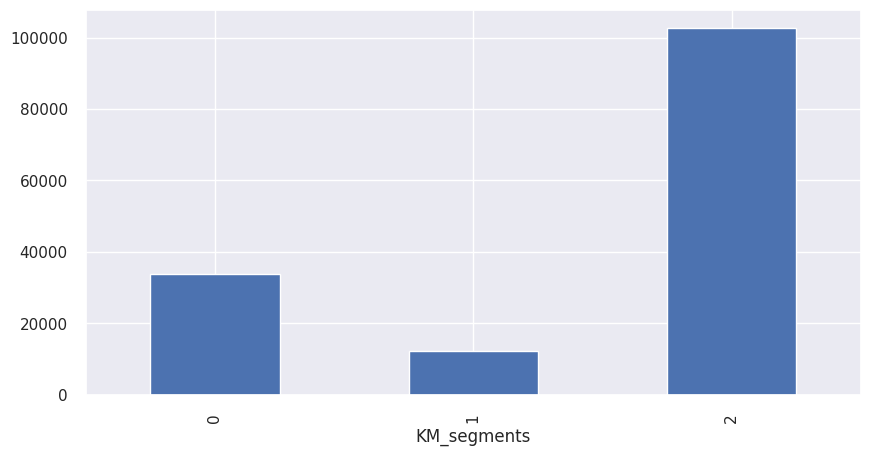

In [ ]:
# Checking the groups for Avg_Credit_Limit
km_cluster_profile['Avg_Credit_Limit'].groupby('KM_segments').mean(numeric_only = True).plot.bar(figsize=(10, 5))

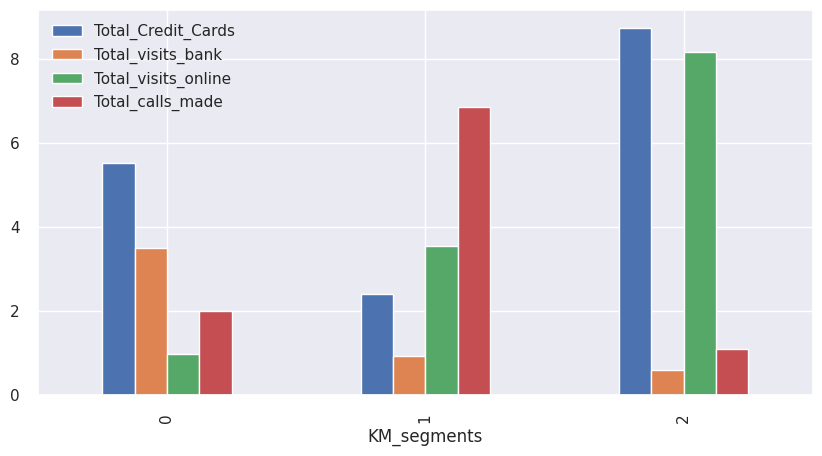

In [ ]:
# Checking the groups for the remainder features
km_cluster_profile[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].groupby('KM_segments').mean().plot.bar(figsize=(10,5));

###**K-means Cluster Summary**###

**Cluster 0:**

- Avg_Credit_Limit is Moderate (approx. 33,782) in Cluster 0.
- Total_Credit_Cards held by customers is Medium (avg. 5.52 cards) in Cluster 0.
- Total_visits_bank is Highest in this Cluster with an avg. approx. 3.49 visits per annum.
- Total_visits_online is Lowest (avg. 0.98 visits per annum)
- Total_calls_made by customers is slightly higher than that of Cluster 2 with an avg. 2 calls per annum.
- Around 60% of the total customers fall in Cluster 0.


**Cluster 1:**
- This cluster represents customers with a relatively low average credit limit of about 12,174.
- Customers in this cluster hold the lowest number of credit cards, averaging around 2.41 cards per person.
- Total_visits_bank is Lower in this Cluster with an avg. approx. 0.93 visits per annum.
- They are moderately active online, with about 3.55 online visits on average. - Cluster 1 customers also make a high number of calls, averaging approximately 6.87 calls.
- This cluster has a total of 224 customers.

**Cluster 2:**
- This cluster represents customers with a relatively highest average credit limit of about 1,02,660.
- Customers in this cluster hold the higest number of credit cards, averaging around 8.74 cards per person.
- Total_visits_bank is Lower in this Cluster with an avg. approx. 0.60 visits per annum.
- They are more active users of online banking, with about 8.18 online visits on average.
- Cluster 1 customers also make least number of calls, averaging approximately 1.08 calls.
- This cluster has a total of 50 customers.

**Insights:**

- Cluster 2 represents high-value customers with the highest credit limits and frequent online visits but minimal bank visits and calls.
- Cluster 1 has relatively low credit limits, makes frequent calls, and has moderate online engagement.
- Cluster 0 includes customers with moderate credit limits and low engagement across bank visits, online visits, and calls.

## **Hierarchical Clustering**

In [ ]:
#Using a copy of df_scaled
df_scaled_hc = df_scaled_backup.copy()
df_scaled_hc.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


###**Computing Cophenetic Correlation**###

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6666982080229052.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8207884321476555.
Cophenetic correlation for Euclidean distance and average linkage is 0.8926672966587861.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8872365340578665.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6882876568342585.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7672199195985938.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8907216945489854.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.782728724334691.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.658393428048562.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.388494379210295.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7998609088477292.
Cophenetic corre

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8926672966587861, which is obtained with Euclidean distance and average linkage.


###**Let's explore different linkage methods with Euclidean distance only**###

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6666982080229052.
Cophenetic correlation for complete linkage is 0.8207884321476555.
Cophenetic correlation for average linkage is 0.8926672966587861.
Cophenetic correlation for centroid linkage is 0.8880634847869346.
Cophenetic correlation for ward linkage is 0.7702265240776373.
Cophenetic correlation for weighted linkage is 0.8872365340578665.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8926672966587861, which is obtained with average linkage.


**Observations:**
- The cophenetic correlation is highest with Euclidean distance and average linkage.

###**Plot dendrograms for each linkage method**###

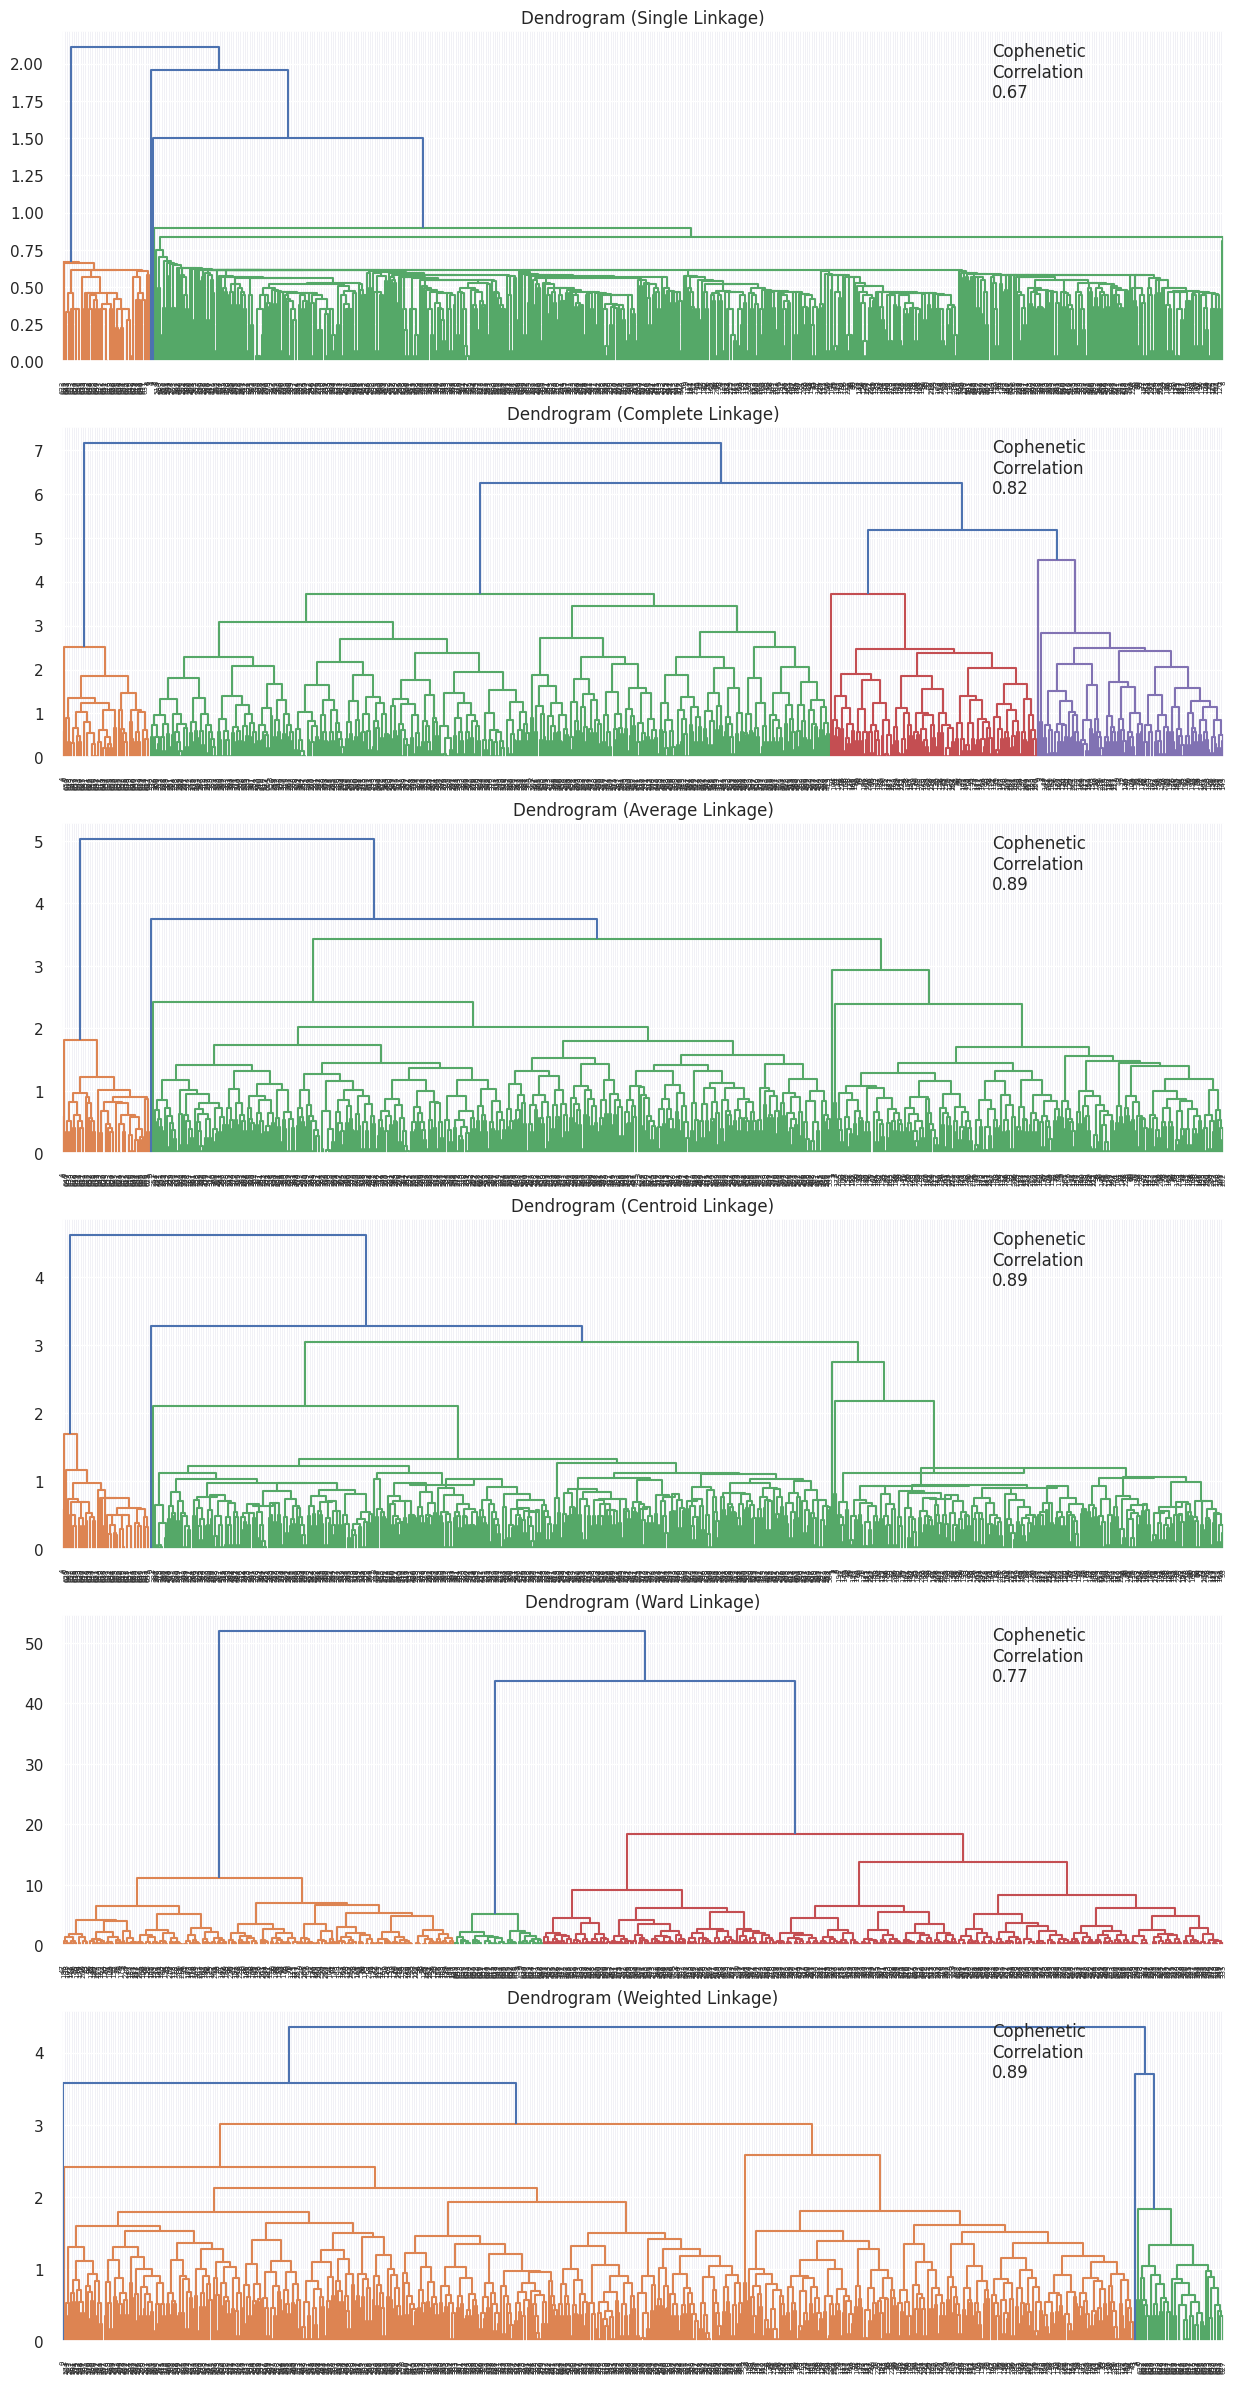

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations:**
- Dendrograms with **Average, Centroid,** and **Weighted** linkage show distinct and well-separated clusters, indicated by the highest correlation score, meaning the clusters are clearly separated from each other.

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.666698
1,complete,0.820788
2,average,0.892667
3,centroid,0.888063
4,ward,0.770227
5,weighted,0.887237


**Observations:**

- Considering both the cophenetic correlation scores and the dendrogram structures, **K = 3** or **K = 4** would be suitable choices for the optimal number of clusters as these values represent points where the clusters are well-separated before the branches start merging closely together.

### **Creating Final Model**

So we are creating 3 Clusters using Hierarchical method as well.

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, linkage="average")
hc_model = hc.fit_predict(df_scaled_hc)

In [ ]:
# adding hierarchical cluster labels to the original dataframe
df_hc = df_backup.copy()
df_hc["HC_segments"] = hc_labels
df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,100000,2,1,1.0,0,2
1,50000,3,0,8.5,9,0
2,50000,7,1,3.0,4,0
3,30000,5,1,1.0,4,0
4,100000,6,0,8.5,3,1


###**Cluster Profiling**###

In [ ]:
hc_cluster_profile = df_hc.groupby('HC_segments').mean()
hc_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_segments,,,,,
0,25725.779967,4.37931,2.553366,1.925287,3.794745
1,102660.000000,8.74000,0.600000,8.180000,1.080000
2,100000.000000,2.00000,1.000000,1.000000,0.000000


In [ ]:
hc_cluster_profile["Count_in_each_segment"] = (
    df_hc.groupby("HC_segments")["Total_Credit_Cards"].count().values
)

# let's display cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
HC_segments,,,,,,
0,25725.779967,4.379310,2.553366,1.925287,3.794745,609
1,102660.000000,8.740000,0.600000,8.180000,1.080000,50
2,100000.000000,2.000000,1.000000,1.000000,0.000000,1


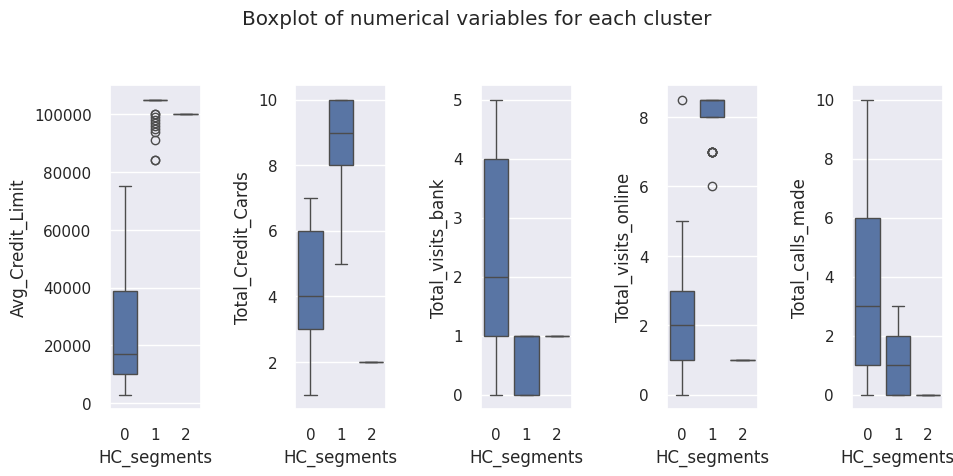

In [ ]:
list_columns =  hc_cluster_profile.columns
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_hc[list_columns[counter]],x=df_hc['HC_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

<Axes: xlabel='HC_segments'>

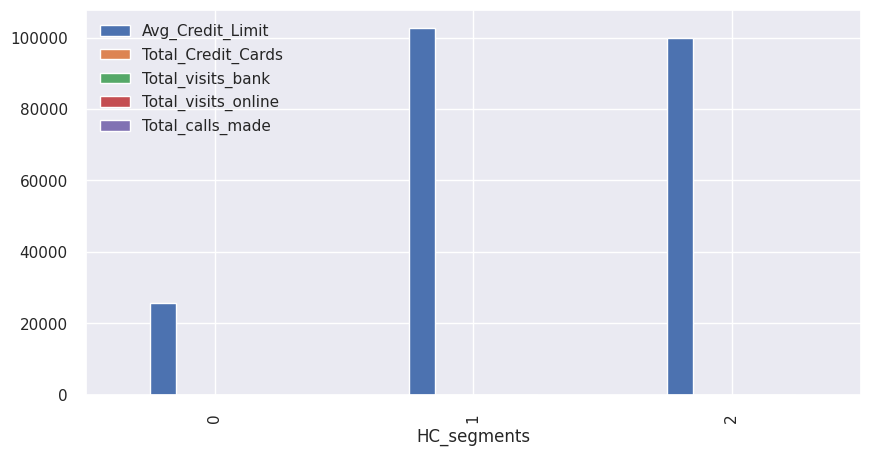

In [ ]:
df_hc.groupby("HC_segments").mean(numeric_only = True).plot.bar(figsize=(10, 5))

The values in Avg_Credit_Limit are significantly larger compared to those in other columns, so we're splitting the bar plot for better feature analysis.








<Axes: xlabel='HC_segments'>

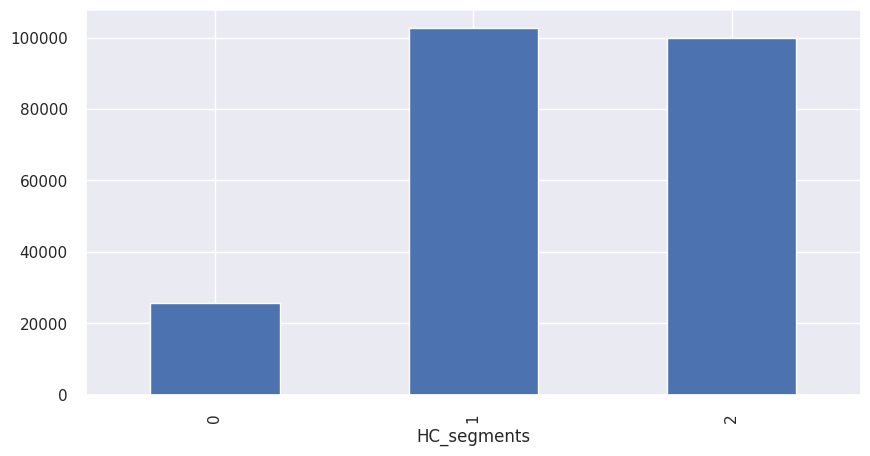

In [ ]:
# Checking the groups for Avg_Credit_Limit
hc_cluster_profile['Avg_Credit_Limit'].groupby('HC_segments').mean(numeric_only = True).plot.bar(figsize=(10, 5))

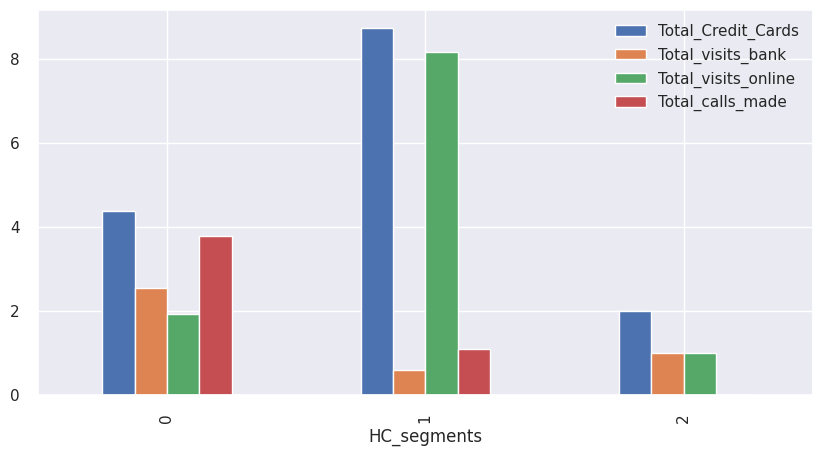

In [ ]:
# Checking the groups for the remainder features
hc_cluster_profile[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].groupby('HC_segments').mean().plot.bar(figsize=(10,5));

###**Hierarchical Cluster Summary**###

**Cluster 0:**
- Avg_Credit_Limit is Lowest (approx. 25725) in Cluster 0 among the 3 clusters.
- Total_Credit_Cards held by customers is Medium (avg. 4.37 cards) in Cluster 0.
- Total_visits_bank is Highest among the 3 Clusters with an avg. approx. 2.55 visits per annum.
- Total_visits_online is slightly higher than that of cluster 2 (avg. 1.98 visits per annum)
- Total_calls_made by customers is slightly highest with an avg. 3.79 calls per annum.
- Around 92% of the total customers fall in this cluster.

**Cluster 1:**
- This cluster represents customers with a highest average credit limit of about 102660.
- Customers in this cluster hold the highest number of credit cards, averaging around 8.74 cards per person.
- Total_visits_bank is Lowest in this Cluster with an avg. approx. 0.60 visits per annum.
- They show a strong preference for digital engagement with about 8.18 online visits on average.
- Cluster 1 customers also make very low number of calls, averaging approximately 1.08 calls per annum.
- This cluster has a total of 60 customers.

**Cluster 2:**
- This segment is an outlier, consisting of a single individual with a very high average credit limit of 100,000 but minimal interaction across channels (only one bank and online visit, and no calls).
- This could represent a unique customer who has high financial capacity but very low engagement, possibly indicating a self-sufficient or low-service-need profile.

**Insights:**

- Cluster 0 represents the general user base with moderate interaction across various channels, whereas Cluster 1 consists of high-value, digitally-engaged users. Cluster 2 could be a special case or an outlier.
- Cluster 1’s high online engagement and low in-person or call interaction suggest a segment of tech-savvy customers who rely heavily on digital channels, contrasting with Cluster 0’s balanced engagement.
- Cluster 1 could be targeted with enhanced online services or exclusive digital offerings, while Cluster 0 might benefit from a more blended approach in outreach across both digital and physical channels.

### **K-means vs Hierarchical Clustering**

In [ ]:
km_cluster_profile["Count_in_each_segment"] = (
    df_km.groupby("KM_segments")["Total_Credit_Cards"].count().values
)

# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
KM_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.546875,6.870536,224
2,102660.000000,8.740000,0.600000,8.180000,1.080000,50


In [ ]:
hc_cluster_profile["Count_in_each_segment"] = (
    df_hc.groupby("HC_segments")["Total_Credit_Cards"].count().values
)

# let's display cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
HC_segments,,,,,,
0,25725.779967,4.379310,2.553366,1.925287,3.794745,609
1,102660.000000,8.740000,0.600000,8.180000,1.080000,50
2,100000.000000,2.000000,1.000000,1.000000,0.000000,1


**Observations**

- Apart from the insights mentioned in the Clustering summary, in both clustering methods, there’s a segment with high credit limits and a strong preference for online engagement (Cluster 2 in K-Means and Cluster 1 in Hierarchical Clustering).
Both methods also identify a balanced cluster with moderate engagement across channels.

- Hierarchical Clustering identified one significant outlier (Cluster 2 with a single individual), which K-Means treated as part of a larger group with lower engagement. This highlights Hierarchical Clustering’s sensitivity to outliers.
Methodological Differences:

- K-Means clustering tends to create more balanced-sized clusters (386, 224, and 50), whereas Hierarchical Clustering formed clusters with starkly different sizes (609, 50, and 1).
This may be due to the fact that K-Means aims to minimize variance within clusters, while Hierarchical Clustering focuses on preserving the nested structure, capturing outliers distinctly.

## **Add-on: PCA for Visualization**

Principal Component Analysis (PCA) is a useful technique for dimensionality reduction. As it is significant more for the datasets with large number of columns, it is optional in the current dataset.

However we use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [ ]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(df_scaled)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 81.72% of the variance in the data.


<Axes: xlabel='Component 1', ylabel='Component 2'>

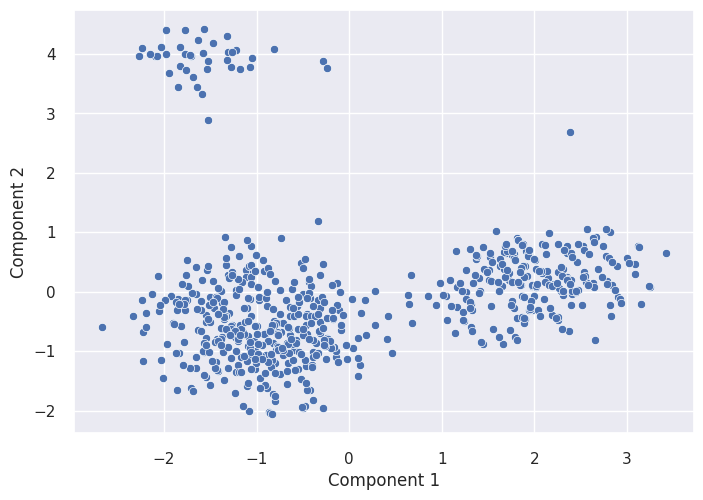

In [ ]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<Axes: xlabel='Component 1', ylabel='Component 2'>

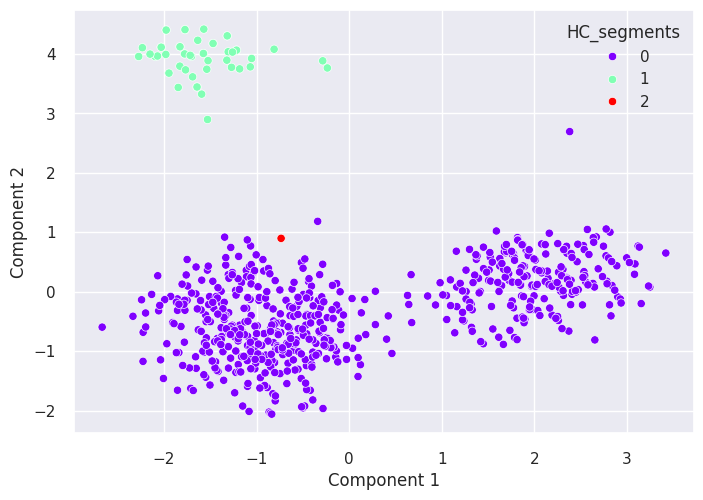

In [ ]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df_hc["HC_segments"],
    palette="rainbow",
)

**Observations**
- Other than Cluster 2, which has only 1 customer, the clusters are pretty well separated.

## **Actionable Insights & Recommendations**

- Both clustering methods identify a high-credit-limit segment with the highest average credit limit, suggesting a potential high-income or high-spending group. These customers, found in HC segment 1 and KM segment 2, also have the highest total credit cards and significant online visits.

- A lower-credit-limit segment, represented by HC segment 0 and KM segment 1, has fewer credit cards and a moderate number of online visits, indicating possibly moderate-income customers.

- Another group, with a mid-range credit limit (found in HC segment 0 and KM segment 0), has fewer online visits and bank visits, suggesting a different interaction pattern.

- High-credit customers are more active online but make fewer calls and visits to banks. This group prefers digital interactions.

- Moderate-credit customers exhibit a balanced mix of online visits, bank visits, and calls, indicating they may need more in-person assistance.

- Low-credit customers have a lower engagement rate, with fewer online visits but a higher tendency to call, which could indicate a preference for direct support.

**Business Recommendations:**
- For high-credit customers (found in HC segment 1 and KM segment 2), focus on personalized digital marketing, emphasizing premium services, rewards, and exclusive offers that enhance their digital banking experience.

- Introduce digital features, like virtual advisors or premium customer service, to cater to their online behavior and preference for digital channels.

- Moderate-credit customers in HC segment 0 and KM segment 1 may require a hybrid approach to customer service, with both digital and physical support. Investing in chatbot or AI-assisted support systems that can guide these customers might reduce their need to visit branches or call.

- For low-credit customers, optimize phone-based support with tailored assistance and suggest credit-building programs to help them improve financial literacy and credit scores.

- For moderate and low-credit customers, offer incentives or tutorials for using online services to reduce branch and call center visits and to increase their use of online services, educating them about the convenience and benefits of digital banking.

- Implement loyalty programs for high-value, high-credit customers to retain them, focusing on long-term rewards and exclusive privileges. Tailored programs for other segments could encourage increased engagement and usage.


By leveraging these insights, the company can:
- Enhance customer satisfaction with more personalized service offerings.
- Reduce operational costs by channeling the right customers to digital channels.